<a href="https://colab.research.google.com/github/Eshwar-Naidus/task-1/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Task 5: Decision Tree & Random Forest (with plot display) ---
Data split: 120 training samples, 30 testing samples.

--- Step 1: Training and Visualizing Full Decision Tree ---
Full tree depth: 5
Saved full tree visualization to /content/decision_tree_full.png
Displaying full tree plot...


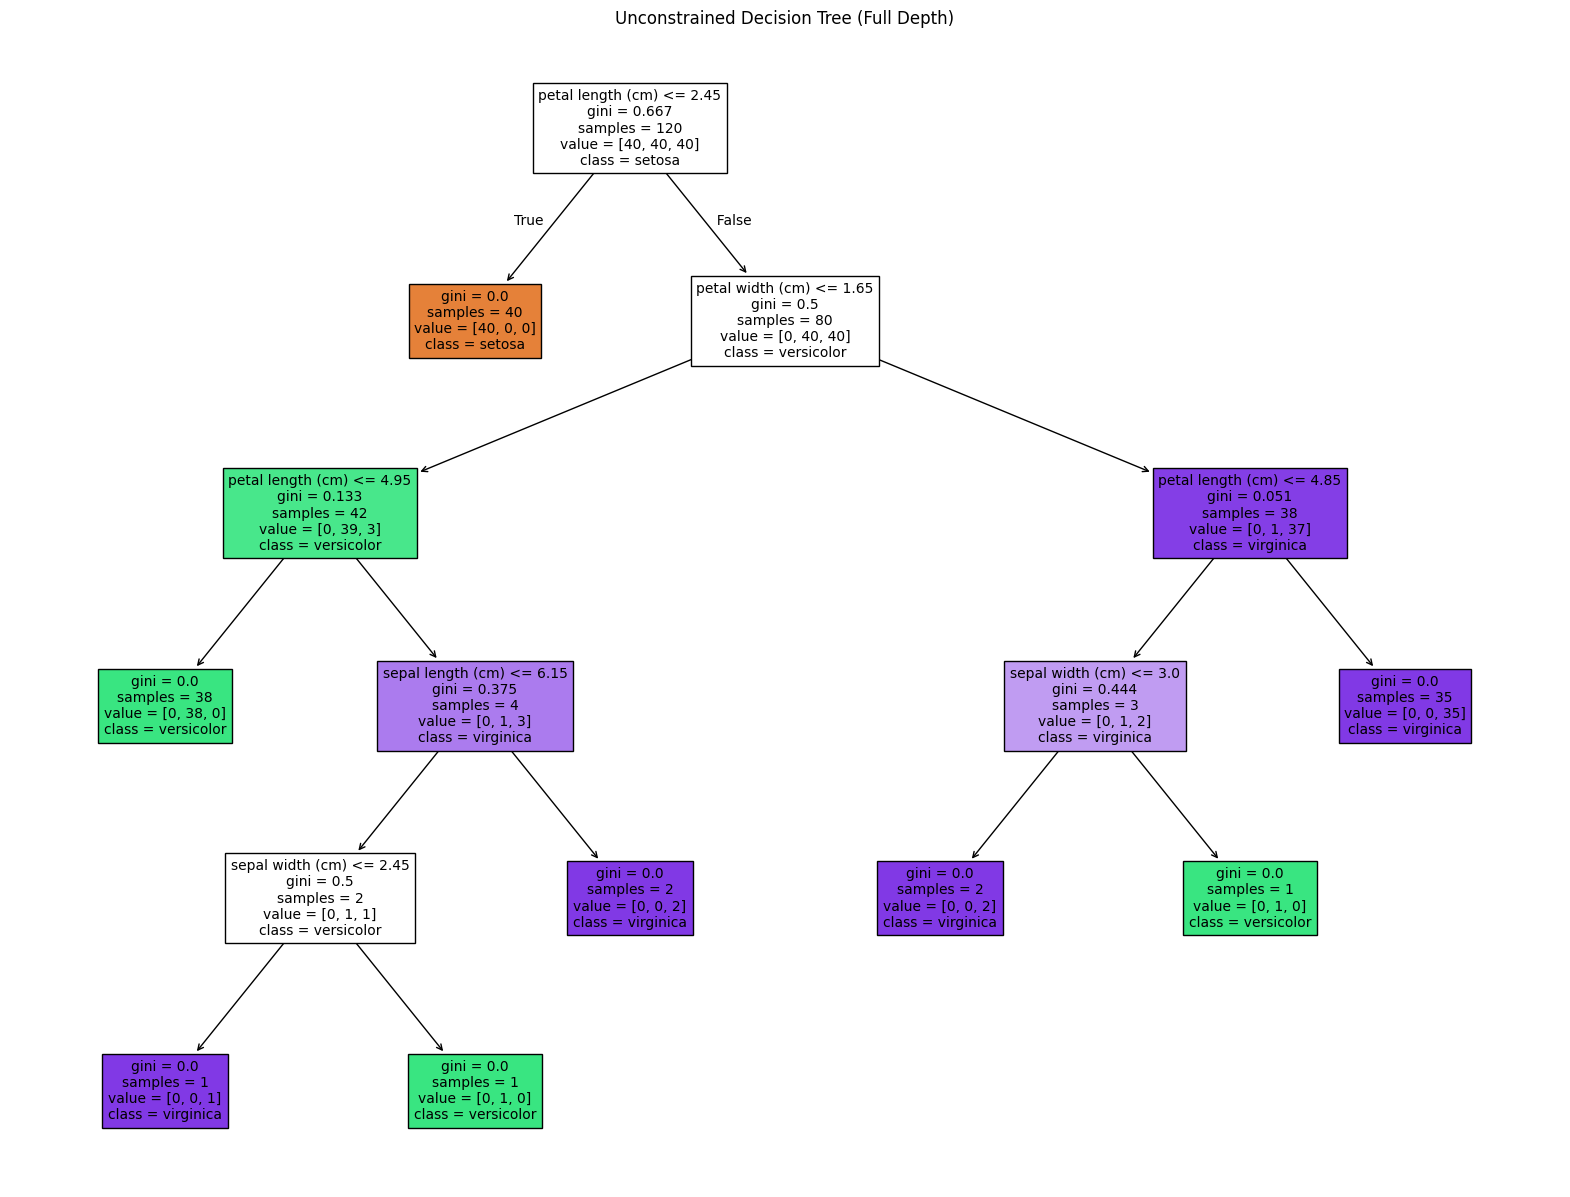


--- Step 2: Analyzing Overfitting & Pruning ---
Full Tree Train Accuracy: 1.0000
Full Tree Test Accuracy:  0.9333
Evidence of overfitting detected (Train accuracy perfect, Test accuracy lower).

Pruned Tree (Depth 3) Train Accuracy: 0.9833
Pruned Tree (Depth 3) Test Accuracy:  0.9667
Saved pruned tree visualization to /content/decision_tree_pruned.png
Displaying pruned tree plot...


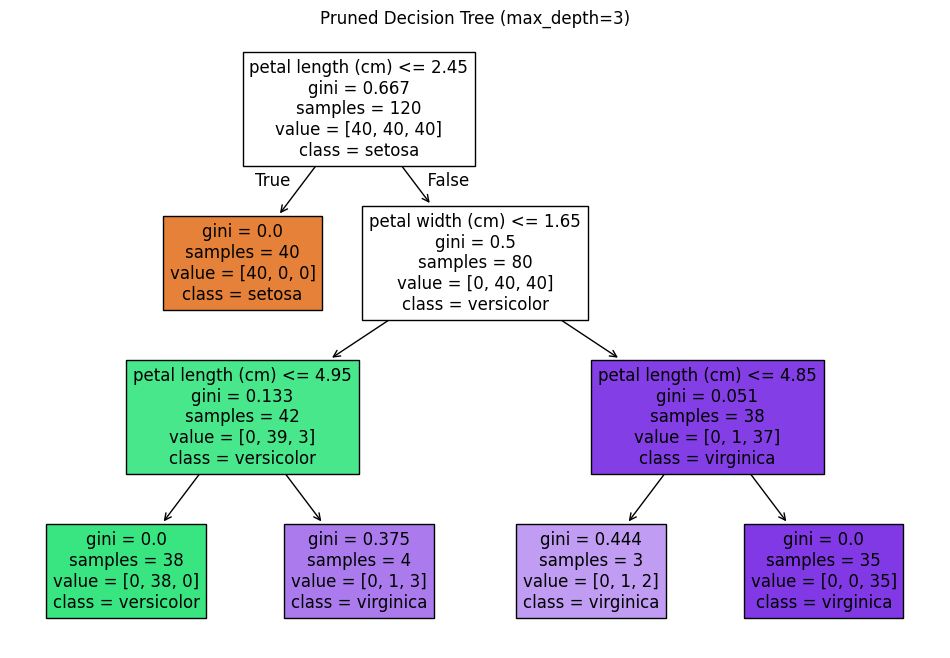


--- Step 3a: Training Random Forest & Comparing Test Accuracy ---
Pruned Decision Tree Test Accuracy: 0.9667
Random Forest Test Accuracy:        0.9000

--- Step 3b: Visualizing Random Forest Predictions ---
Saved Random Forest predictions plot to /content/random_forest_predictions.png
Displaying Random Forest predictions plot...


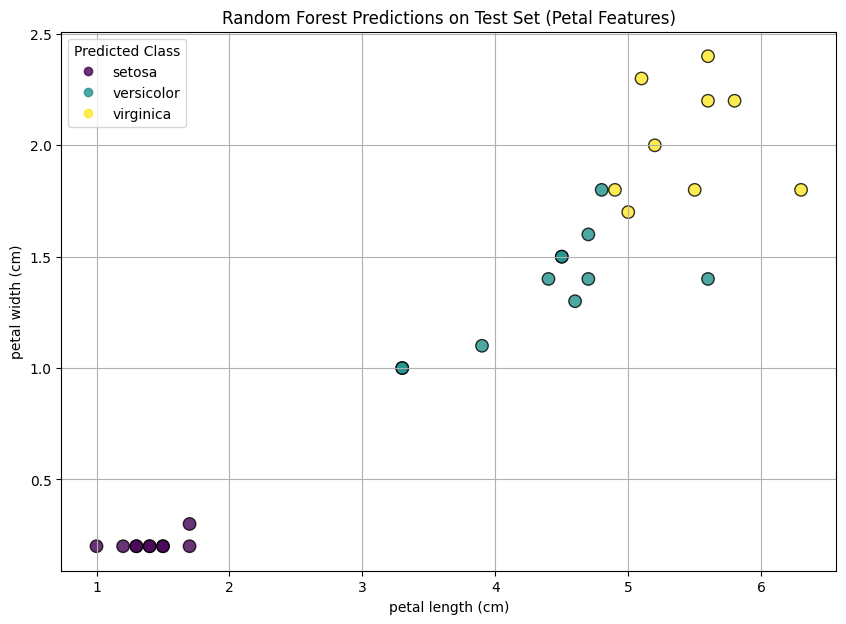


--- Step 4: Feature Importances ---

Feature Importances (Sorted by Random Forest):
             Feature  Decision Tree  Random Forest
3   petal width (cm)       0.420923       0.437185
2  petal length (cm)       0.579077       0.431466
0  sepal length (cm)       0.000000       0.116349
1   sepal width (cm)       0.000000       0.015000
Saved feature importances plot to /content/feature_importances.png
Displaying feature importances plot...


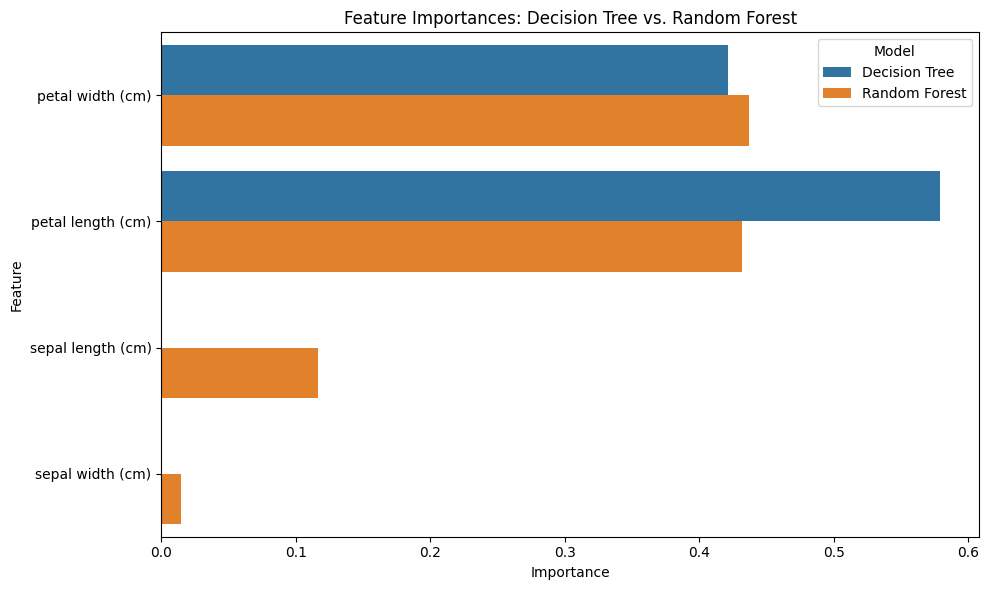


--- Step 5: Cross-Validation (5-Fold) ---
Pruned Decision Tree (5-Fold CV) Scores: [0.96666667 0.96666667 0.93333333 1.         1.        ]
Pruned Decision Tree Mean Accuracy: 0.9733 (+/- 0.0499)

Random Forest (5-Fold CV) Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Random Forest Mean Accuracy: 0.9667 (+/- 0.0422)

--- Script Finished ---


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import os

print("--- Task 5: Decision Tree & Random Forest (with plot display) ---")

# --- Load Data ---
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
# Ensure class_names is a list of strings for plot_tree
class_names = [str(name) for name in iris.target_names]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# --- Step 1: Train a Decision Tree Classifier and Visualize (Full Depth) ---
print("\n--- Step 1: Training and Visualizing Full Decision Tree ---")
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

# Visualize the full tree
plt.figure(figsize=(20, 15))
plot_tree(dt_full,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          fontsize=10)
plt.title("Unconstrained Decision Tree (Full Depth)")
full_tree_path = 'decision_tree_full.png'
plt.savefig(full_tree_path)
print(f"Full tree depth: {dt_full.get_depth()}")
print(f"Saved full tree visualization to {os.path.abspath(full_tree_path)}")
print("Displaying full tree plot...")
plt.show() # <-- ADDED: Display the plot in a pop-up window
plt.close() # Close the plot figure to free memory

# --- Step 2: Analyze Overfitting and Control Tree Depth ---
print("\n--- Step 2: Analyzing Overfitting & Pruning ---")
y_pred_train_full = dt_full.predict(X_train)
y_pred_test_full = dt_full.predict(X_test)
train_acc_full = accuracy_score(y_train, y_pred_train_full)
test_acc_full = accuracy_score(y_test, y_pred_test_full)
print(f"Full Tree Train Accuracy: {train_acc_full:.4f}")
print(f"Full Tree Test Accuracy:  {test_acc_full:.4f}")
if train_acc_full > test_acc_full + 0.05 and train_acc_full == 1.0:
    print("Evidence of overfitting detected (Train accuracy perfect, Test accuracy lower).")

# Control tree depth
PRUNED_DEPTH = 3
dt_pruned = DecisionTreeClassifier(max_depth=PRUNED_DEPTH, random_state=42)
dt_pruned.fit(X_train, y_train)

# Visualize the pruned tree
plt.figure(figsize=(12, 8))
plot_tree(dt_pruned,
          feature_names=feature_names,
          class_names=class_names,
          filled=True)
plt.title(f"Pruned Decision Tree (max_depth={PRUNED_DEPTH})")
pruned_tree_path = 'decision_tree_pruned.png'
plt.savefig(pruned_tree_path)
print(f"\nPruned Tree (Depth {PRUNED_DEPTH}) Train Accuracy: {accuracy_score(dt_pruned.predict(X_train), y_train):.4f}")
print(f"Pruned Tree (Depth {PRUNED_DEPTH}) Test Accuracy:  {accuracy_score(dt_pruned.predict(X_test), y_test):.4f}")
print(f"Saved pruned tree visualization to {os.path.abspath(pruned_tree_path)}")
print("Displaying pruned tree plot...")
plt.show() # <-- ADDED: Display the plot in a pop-up window
plt.close() # Close the plot figure

# --- Step 3a: Train a Random Forest and Compare Accuracy ---
print("\n--- Step 3a: Training Random Forest & Comparing Test Accuracy ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Compare accuracy on the test set
y_pred_rf = rf.predict(X_test)
rf_test_acc = accuracy_score(y_test, y_pred_rf)
print(f"Pruned Decision Tree Test Accuracy: {accuracy_score(y_test, dt_pruned.predict(X_test)):.4f}")
print(f"Random Forest Test Accuracy:        {rf_test_acc:.4f}")

# --- Step 3b: Visualize Random Forest Predictions on Test Set ---
print("\n--- Step 3b: Visualizing Random Forest Predictions ---")
feature_idx1 = 2 # Petal Length
feature_idx2 = 3 # Petal Width

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_test[:, feature_idx1], X_test[:, feature_idx2], c=y_pred_rf, cmap=plt.cm.viridis, edgecolor='k', s=80, alpha=0.8)
plt.title("Random Forest Predictions on Test Set (Petal Features)")
plt.xlabel(feature_names[feature_idx1])
plt.ylabel(feature_names[feature_idx2])
handles, _ = scatter.legend_elements()
plt.legend(handles, class_names, title="Predicted Class")
plt.grid(True)
rf_pred_path = 'random_forest_predictions.png'
plt.savefig(rf_pred_path)
print(f"Saved Random Forest predictions plot to {os.path.abspath(rf_pred_path)}")
print("Displaying Random Forest predictions plot...")
plt.show() # <-- ADDED: Display the plot in a pop-up window
plt.close()

# --- Step 4: Interpret Feature Importances ---
print("\n--- Step 4: Feature Importances ---")
importances_dt = dt_pruned.feature_importances_
importances_rf = rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree': importances_dt,
    'Random Forest': importances_rf
}).sort_values(by='Random Forest', ascending=False)

features_df_melted = features_df.melt(id_vars='Feature', var_name='Model', value_name='Importance')

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df_melted, x='Importance', y='Feature', hue='Model', orient='h')
plt.title("Feature Importances: Decision Tree vs. Random Forest")
plt.tight_layout()
importances_path = 'feature_importances.png'
plt.savefig(importances_path)
print(f"\nFeature Importances (Sorted by Random Forest):\n{features_df[['Feature', 'Decision Tree', 'Random Forest']]}")
print(f"Saved feature importances plot to {os.path.abspath(importances_path)}")
print("Displaying feature importances plot...")
plt.show() # <-- ADDED: Display the plot in a pop-up window
plt.close()

# --- Step 5: Evaluate Using Cross-Validation ---
print("\n--- Step 5: Cross-Validation (5-Fold) ---")
cv_folds = 5
dt_cv_scores = cross_val_score(dt_pruned, X, y, cv=cv_folds)
rf_cv_scores = cross_val_score(rf, X, y, cv=cv_folds)

print(f"Pruned Decision Tree ({cv_folds}-Fold CV) Scores: {dt_cv_scores}")
print(f"Pruned Decision Tree Mean Accuracy: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std() * 2:.4f})")

print(f"\nRandom Forest ({cv_folds}-Fold CV) Scores: {rf_cv_scores}")
print(f"Random Forest Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

#print("\n--- Script Finished ---")